In [1]:
from patching import (
    import_shapefile_for_patches,
    do_the_patching,
    store_coco_ground_truth,
    import_image,
)
from patchutils import other

/home/robert/.pyenv/versions/ds-wildfire/lib/python3.8/site-packages/typeguard/__init__.py:834: UserWarning: no type annotations present -- not typechecking patching.import_shapefile_for_patches
  warn('no type annotations present -- not typechecking {}'.format(function_name(func)))


In [2]:
from patchutils.coco import save_gt_overlaid
from docopt import docopt
import os
import glob
import rasterio
import geopandas as gp
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
import geopandas as gpd
import numpy as np
import pandas as pd


num_patches=1000
patch_size=128
scenes_path="/home/robert/ds-wildfire/data/mgrs_scenes"
scenes="31/T/GJ"
scenes_string="_31_T_GJ_"
shapefile="/data/raw_data/wildfires-ground-truth/france/vars/N_DFCI_CONTOUR_FEUX_2017_S_083.shp"
save_path="/home/robert/ds-wildfire/data_exp"
class_name="DATE_ECLOS"

In [3]:
date_datetime = []
date_string = []
date = []

In [4]:
    path_to_store_patches = os.path.join(save_path, "patches")
    os.makedirs(path_to_store_patches, exist_ok=True)
    path_to_store_anno = os.path.join(save_path, "anno")
    os.makedirs(path_to_store_anno, exist_ok=True)
    path_to_store_burn_vis = os.path.join(save_path, "burn_vis")
    os.makedirs(path_to_store_burn_vis, exist_ok=True)
    path_to_store_patches_prev = os.path.join(save_path, "patches_prev")
    os.makedirs(path_to_store_patches_prev, exist_ok=True)
    path_to_store_anno_prev = os.path.join(save_path, "anno_prev")
    os.makedirs(path_to_store_anno_prev, exist_ok=True)
    path_to_store_burn_vis_prev = os.path.join(save_path, "burn_vis_prev")
    os.makedirs(path_to_store_burn_vis_prev, exist_ok=True)

In [35]:
gdf = gpd.read_file(shapefile)
# load the shapefile data of the 14 days prior to the date of the mgrs scene
shapefile_date1=gdf.loc[(gdf['DATE_ECLOS']<map_of_paths.index[10].strftime('%Y-%m-%d'))&(gdf['DATE_ECLOS']>(map_of_paths.index[date_var3]-timedelta(days=45)).strftime('%Y-%m-%d'))]
shapefile_date1

,ID_PROMETH,HEURE_DEBU,COMMUNE_EC,DATE_ECLOS,LIEU_DIT,SURFACE_SI,SURFACE_DE,QUALITE_DO,ENQUETE_FE,OBSERVATIO,geometry
0,2694,13h30,RAMATUELLE,2017-06-07,LA QUESSINE,157229.745,"15,64 ha",RELEVE GPS,RCCI_MACHINE-OUTILS,TONDEUSE,"MULTIPOLYGON (((996933.218 6240075.129, 996934..."
2,0,None,TRIGANCE,2017-06-15,COLLINE D'ESTELLE,1158500.000,"115, 80 ha",IMAGE SATELLITE SENTINEL,CANJUERS TIRS MUNITIONS,TRAITEMENT IMAGE SENTINEL 2,"POLYGON ((976398.645 6294995.096, 976398.604 6..."
4,4787,14h30,BORMES-LES-MIMOSAS,2017-07-07,SIOUVETTE,0.000,"4,47 ha",RELEVE GPS,RCCI_JETS OBJETS INCANDESCENTS,SUPPOSEE,"POLYGON ((979999.922 6240348.027, 979994.476 6..."
5,2601,13h26,BORMES-LES-MIMOSAS,2017-06-21,HAUT PARA,0.000,"3,17 ha",RELEVE GPS,RCCI_MACHINE-OUTILS,cause accidentelle (travaux forestiers),"POLYGON ((970608.889 6233760.310, 970587.150 6..."


In [36]:
gdf

,ID_PROMETH,HEURE_DEBU,COMMUNE_EC,DATE_ECLOS,LIEU_DIT,SURFACE_SI,SURFACE_DE,QUALITE_DO,ENQUETE_FE,OBSERVATIO,geometry
0,2694,13h30,RAMATUELLE,2017-06-07,LA QUESSINE,1.572297e+05,"15,64 ha",RELEVE GPS,RCCI_MACHINE-OUTILS,TONDEUSE,"MULTIPOLYGON (((996933.218 6240075.129, 996934..."
1,5135,19h35,LA CROIX-VALMER,2017-07-24,GIGARO,0.000000e+00,506 ha,IMAGE SATELLITE SENTINEL,RCCI_JETS OBJETS INCANDESCENTS,Synthèse IMAGE SENTINEL 2 et relevés GPS,"MULTIPOLYGON (((996138.181 6237162.083, 996167..."
2,0,None,TRIGANCE,2017-06-15,COLLINE D'ESTELLE,1.158500e+06,"115, 80 ha",IMAGE SATELLITE SENTINEL,CANJUERS TIRS MUNITIONS,TRAITEMENT IMAGE SENTINEL 2,"POLYGON ((976398.645 6294995.096, 976398.604 6..."
3,4669,23h00,LA LONDE-LES-MAURES,2017-07-25,VAL ROSE,1.423050e+07,"1423,05 ha",IMAGE SATELLITE SENTINEL,RCCI _MALVEILLANCE_SUPPOSEE,TRAITEMENT IMAGE SENTINEL 2,"MULTIPOLYGON (((967149.726 6232341.320, 967169..."
4,4787,14h30,BORMES-LES-MIMOSAS,2017-07-07,SIOUVETTE,0.000000e+00,"4,47 ha",RELEVE GPS,RCCI_JETS OBJETS INCANDESCENTS,SUPPOSEE,"POLYGON ((979999.922 6240348.027, 979994.476 6..."
5,2601,13h26,BORMES-LES-MIMOSAS,2017-06-21,HAUT PARA,0.000000e+00,"3,17 ha",RELEVE GPS,RCCI_MACHINE-OUTILS,cause accidentelle (travaux forestiers),"POLYGON ((970608.889 6233760.310, 970587.150 6..."
6,5133,22h12,ARTIGUES,2017-07-24,COLLE PELADE,1.780380e+07,1704 ha,IMAGE SATELLITE SENTINEL,RCCI _MALVEILLANCE,TRAITEMENT IMAGE SENTINEL 2,"MULTIPOLYGON (((934652.103 6275662.078, 934646..."
7,6496,16h28,FREJUS,2017-09-01,A8 CAPITOU,3.470000e+05,"34,7 ha",GPS,RCCI_JETS OBJETS INCANDESCENTS,None,"MULTIPOLYGON (((1004320.901 6272550.143, 10042..."
8,6782,22h00,HYERES,2017-09-02,CHEMIN DES MAURES,4.318000e+06,431 ha,RELEVE TERRAIN,RCCI_MALVEILLANCE,None,"MULTIPOLYGON (((959136.098 6233651.015, 959161..."
9,0,None,COMPS/ARTUBY,2017-10-08,LA VERRERIE,2.381340e+02,"238,13 ha",IMAGE SATELLITE SENTINEL,CANJUERS TIRS MUNITIONS,TRAITEMENT IMAGE SENTINEL 2,"MULTIPOLYGON (((980684.678 6292938.727, 980684..."


In [23]:
gdf_filter=gdf["DATE_ECLOS"]<map_of_paths.index[10].strftime('%Y-%m-%d')
new_gdf=gdf[gdf_filter]
new_gdf

,ID_PROMETH,HEURE_DEBU,COMMUNE_EC,DATE_ECLOS,LIEU_DIT,SURFACE_SI,SURFACE_DE,QUALITE_DO,ENQUETE_FE,OBSERVATIO,geometry
0,2694,13h30,RAMATUELLE,2017-06-07,LA QUESSINE,157229.745,"15,64 ha",RELEVE GPS,RCCI_MACHINE-OUTILS,TONDEUSE,"MULTIPOLYGON (((996933.218 6240075.129, 996934..."
2,0,None,TRIGANCE,2017-06-15,COLLINE D'ESTELLE,1158500.000,"115, 80 ha",IMAGE SATELLITE SENTINEL,CANJUERS TIRS MUNITIONS,TRAITEMENT IMAGE SENTINEL 2,"POLYGON ((976398.645 6294995.096, 976398.604 6..."
4,4787,14h30,BORMES-LES-MIMOSAS,2017-07-07,SIOUVETTE,0.000,"4,47 ha",RELEVE GPS,RCCI_JETS OBJETS INCANDESCENTS,SUPPOSEE,"POLYGON ((979999.922 6240348.027, 979994.476 6..."
5,2601,13h26,BORMES-LES-MIMOSAS,2017-06-21,HAUT PARA,0.000,"3,17 ha",RELEVE GPS,RCCI_MACHINE-OUTILS,cause accidentelle (travaux forestiers),"POLYGON ((970608.889 6233760.310, 970587.150 6..."


In [30]:
new_gdf=gdf[(gdf["DATE_ECLOS"]<map_of_paths.index[10].strftime('%Y-%m-%d'))&(gdf['DATE_ECLOS']>(map_of_paths.index[10]-timedelta(days=45)).strftime('%Y-%m-%d'))]
new_gdf

,ID_PROMETH,HEURE_DEBU,COMMUNE_EC,DATE_ECLOS,LIEU_DIT,SURFACE_SI,SURFACE_DE,QUALITE_DO,ENQUETE_FE,OBSERVATIO,geometry
2,0,None,TRIGANCE,2017-06-15,COLLINE D'ESTELLE,1158500.0,"115, 80 ha",IMAGE SATELLITE SENTINEL,CANJUERS TIRS MUNITIONS,TRAITEMENT IMAGE SENTINEL 2,"POLYGON ((976398.645 6294995.096, 976398.604 6..."
4,4787,14h30,BORMES-LES-MIMOSAS,2017-07-07,SIOUVETTE,0.0,"4,47 ha",RELEVE GPS,RCCI_JETS OBJETS INCANDESCENTS,SUPPOSEE,"POLYGON ((979999.922 6240348.027, 979994.476 6..."
5,2601,13h26,BORMES-LES-MIMOSAS,2017-06-21,HAUT PARA,0.0,"3,17 ha",RELEVE GPS,RCCI_MACHINE-OUTILS,cause accidentelle (travaux forestiers),"POLYGON ((970608.889 6233760.310, 970587.150 6..."


In [28]:
map_of_paths.index[10]

Timestamp('2017-07-22 00:00:00')

In [4]:
path_to_scene = os.path.join(
            scenes_path, scenes)
        
list_of_paths = glob.glob(
            path_to_scene + "/*/*/*/" + "*.tif".format(scenes)
        )

In [7]:
for date_var1 in range (0, len(list_of_paths)):
    date_index = list_of_paths[date_var1].index("201")
    date_end_index = list_of_paths[date_var1].index("/B8A")
    date.append(list_of_paths[date_var1][date_index:date_end_index])
    date_datetime.append(datetime.strptime(date[date_var1], '%Y/%m/%d'))


# create sorted Pandas series for dates and paths
date_file_mapping = {dt: filename for dt, filename in zip(date_datetime, list_of_paths)}
map_of_paths=pd.Series(date_file_mapping).sort_index()

# create sorted date list
for date_var2 in range (0, len(map_of_paths)):  
    date_string.append(map_of_paths.index[date_var2].strftime('%Y-%m-%d'))
   
    
for date_var3 in range (0, len(map_of_paths)): 
    #import image
    raster1 = import_image(map_of_paths[date_var3])
    raster_meta1 = raster1.meta
    
    #load the shapefiles
    gdf = gpd.read_file(shapefile)
    # load the shapefile data of the days prior to the date of the mgrs scene
    shapefile_date1=gdf[(gdf["DATE_ECLOS"]<map_of_paths.index[date_var3].strftime('%Y-%m-%d'))]#&(gdf['DATE_ECLOS']>(map_of_paths.index[date_var3]-timedelta(days=45)).strftime('%Y-%m-%d'))]
    
    #create windows from where shapefile and scenes overlap
    patch_dfs1, patch_windows1 = import_shapefile_for_patches(
        shapefile_date1, raster1, raster_meta1, patch_size, num_patches, scenes_string + date_string[date_var3]
    )
    
    #patch from the given scenes
    do_the_patching(
                raster1,
                path_to_store_patches,
                patch_windows1.keys(),
                patch_windows1.values(),
                bands=[3,2,1],
    )
    
     # Save annotations
    store_coco_ground_truth(
        path_to_store_anno, patch_dfs1, patch_size, class_name, scenes_string + date_string[date_var3]
    )
            

    #create overlaid patches with ground truth
    try:
        save_gt_overlaid(
            os.path.join(path_to_store_anno, "anno{}.json".format(scenes_string + date_string[date_var3])),
            path_to_store_patches,
            path_to_store_burn_vis,
            )
    except Exception as e:
        print(e)
        print("MGRS tile without annotations: {}".format(scenes_string))

    raster1.close()
    
    #patch image from previous satelite image
    """
    if date_var3>1:
        for date_var4 in range (date_var3-2,date_var3):
            raster_prev = import_image(map_of_paths[date_var4])
            raster_meta_prev = raster_prev.meta
        
            # load the shapefile data of the days prior to the date of the mgrs scene
            shapefile_date_prev=gdf[(gdf["DATE_ECLOS"]<map_of_paths.index[date_var4].strftime('%Y-%m-%d'))]#&(gdf['DATE_ECLOS']>(map_of_paths.index[date_var4]-timedelta(days=45)).strftime('%Y-%m-%d'))]
        
            patch_dfs_prev, patch_windows_prev = import_shapefile_for_patches(
                shapefile_date_prev, raster_prev, raster_meta_prev, patch_size, num_patches, scenes_string + date_string[date_var4]
            )
    
            do_the_patching(
                raster_prev,
                path_to_store_patches_prev,
                patch_windows_prev.keys(),
                patch_windows1.values(),
                bands=[3,2,1],
            )
    
             # Save annotations
            store_coco_ground_truth(
            path_to_store_anno_prev, patch_dfs_prev, patch_size, class_name, scenes_string + date_string[date_var4]
            )
            

            #create overlaid patches with ground truth
            try:
                save_gt_overlaid(
                    os.path.join(path_to_store_anno_prev, "anno{}.json".format(scenes_string + date_string[date_var4])),
                    path_to_store_patches_prev,
                    path_to_store_burn_vis_prev,
                    )
            except Exception as e:
                print(e)
                print("MGRS tile without annotations: {}".format(scenes_string))

            raster_prev.close()
        """

1764it [00:04, 420.09it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

Writing new json file... /home/robert/ds-wildfire/data_exp/anno/anno_31_T_GJ_2015-07-30.json
'annotations'
MGRS tile without annotations: _31_T_GJ_


1764it [00:04, 418.87it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

Writing new json file... /home/robert/ds-wildfire/data_exp/anno/anno_31_T_GJ_2015-08-06.json
'annotations'
MGRS tile without annotations: _31_T_GJ_


1764it [00:04, 420.14it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

Writing new json file... /home/robert/ds-wildfire/data_exp/anno/anno_31_T_GJ_2015-08-12.json
'annotations'
MGRS tile without annotations: _31_T_GJ_


1764it [00:04, 419.56it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

Writing new json file... /home/robert/ds-wildfire/data_exp/anno/anno_31_T_GJ_2016-07-11.json
'annotations'
MGRS tile without annotations: _31_T_GJ_


1764it [00:04, 419.34it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

Writing new json file... /home/robert/ds-wildfire/data_exp/anno/anno_31_T_GJ_2016-07-14.json
'annotations'
MGRS tile without annotations: _31_T_GJ_


1764it [00:04, 419.59it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

Writing new json file... /home/robert/ds-wildfire/data_exp/anno/anno_31_T_GJ_2016-07-17.json
'annotations'
MGRS tile without annotations: _31_T_GJ_


1764it [00:04, 420.24it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

Writing new json file... /home/robert/ds-wildfire/data_exp/anno/anno_31_T_GJ_2016-07-21.json
'annotations'
MGRS tile without annotations: _31_T_GJ_


1764it [00:04, 433.75it/s]
0it [00:00, ?it/s]
/home/robert/ds-wildfire/preparedata/patchutils/geo.py:146: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array(geojson["coordinates"]), precision
0it [00:00, ?it/s]

Writing new json file... /home/robert/ds-wildfire/data_exp/anno/anno_31_T_GJ_2017-06-12.json
'annotations'
MGRS tile without annotations: _31_T_GJ_


1764it [00:04, 423.73it/s]
2it [00:00, 238.15it/s]


Writing new json file... /home/robert/ds-wildfire/data_exp/anno/anno_31_T_GJ_2017-06-16.json


/home/robert/ds-wildfire/preparedata/patchutils/geo.py:146: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array(geojson["coordinates"]), precision
1764it [00:04, 424.19it/s]
2it [00:00, 189.71it/s]


Writing new json file... /home/robert/ds-wildfire/data_exp/anno/anno_31_T_GJ_2017-06-19.json


/home/robert/ds-wildfire/preparedata/patchutils/geo.py:146: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array(geojson["coordinates"]), precision
1764it [00:04, 424.23it/s]
2it [00:00, 234.57it/s]


Writing new json file... /home/robert/ds-wildfire/data_exp/anno/anno_31_T_GJ_2017-07-22.json


/home/robert/ds-wildfire/preparedata/patchutils/geo.py:146: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array(geojson["coordinates"]), precision
1764it [00:04, 424.48it/s]
2it [00:00, 126.39it/s]


Writing new json file... /home/robert/ds-wildfire/data_exp/anno/anno_31_T_GJ_2017-07-24.json


/home/robert/ds-wildfire/preparedata/patchutils/geo.py:146: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array(geojson["coordinates"]), precision
1764it [00:04, 401.92it/s]
12it [00:00, 295.99it/s]


Writing new json file... /home/robert/ds-wildfire/data_exp/anno/anno_31_T_GJ_2017-07-26.json


/home/robert/ds-wildfire/preparedata/patchutils/geo.py:146: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array(geojson["coordinates"]), precision
1764it [00:04, 402.87it/s]
13it [00:00, 302.59it/s]


Writing new json file... /home/robert/ds-wildfire/data_exp/anno/anno_31_T_GJ_2017-09-04.json


/home/robert/ds-wildfire/preparedata/patchutils/geo.py:146: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array(geojson["coordinates"]), precision
1764it [00:04, 401.90it/s]
13it [00:00, 294.05it/s]


Writing new json file... /home/robert/ds-wildfire/data_exp/anno/anno_31_T_GJ_2017-09-05.json


/home/robert/ds-wildfire/preparedata/patchutils/geo.py:146: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array(geojson["coordinates"]), precision
1764it [00:04, 402.84it/s]
13it [00:00, 222.70it/s]


Writing new json file... /home/robert/ds-wildfire/data_exp/anno/anno_31_T_GJ_2017-09-07.json


/home/robert/ds-wildfire/preparedata/patchutils/geo.py:146: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array(geojson["coordinates"]), precision
1764it [00:04, 402.46it/s]
13it [00:00, 220.50it/s]


Writing new json file... /home/robert/ds-wildfire/data_exp/anno/anno_31_T_GJ_2017-10-07.json


/home/robert/ds-wildfire/preparedata/patchutils/geo.py:146: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array(geojson["coordinates"]), precision
1764it [00:04, 392.34it/s]
15it [00:00, 249.50it/s]


Writing new json file... /home/robert/ds-wildfire/data_exp/anno/anno_31_T_GJ_2017-10-09.json


/home/robert/ds-wildfire/preparedata/patchutils/geo.py:146: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array(geojson["coordinates"]), precision
1764it [00:04, 390.97it/s]
15it [00:00, 271.13it/s]


Writing new json file... /home/robert/ds-wildfire/data_exp/anno/anno_31_T_GJ_2017-10-10.json


In [141]:
import pandas as pd
for date_var in range (0, 10):
    date_index = list_of_paths[date_var].index("201")
    date_end_index = list_of_paths[date_var].index("/B8A")
    date[date_var] = list_of_paths[date_var][date_index:date_end_index]
    date_datetime[date_var] = datetime.strptime(date[date_var], '%Y/%m/%d')

    date_string[date_var]=date_datetime[date_var].strftime('%Y-%m-%d')

In [142]:


for date_var in range (0, len(list_of_paths)):
    date_index = list_of_paths[date_var].index("201")
    date_end_index = list_of_paths[date_var].index("/B8A")
    date_datetime.append(datetime.strptime(date[date_var], '%Y/%m/%d'))
    
    # create sorted Pandas series for dates and paths
    date_file_mapping = {dt: filename for dt, filename in zip(date_datetime, list_of_paths)}
    map_of_paths=pd.Series(date_file_mapping).sort_index()
    
    # create sorted date list
    date_string.append(map_of_paths.index[date_var].strftime('%Y-%m-%d'))

In [26]:
date_string

['2017-07-24', '2017-07-24', '2017-07-24', '2017-07-24', '2017-07-24']

In [144]:
date_string

['2015-07-30',
 '2015-08-12',
 '2015-08-12',
 '2016-07-11',
 '2016-07-14',
 '2016-07-17',
 '2016-07-21',
 '2017-10-10',
 '2017-10-10',
 '2017-10-10',
 '2017-10-10',
 '2017-10-10',
 '2017-10-10',
 '2017-10-10',
 '2017-10-10',
 '2017-10-10',
 '2017-10-10',
 '2017-10-10',
 '2017-10-10']

In [108]:
list_of_paths

['/home/robert/ds-wildfire/data/mgrs_scenes/31/T/GJ/2015/7/30/B8AB11B12.tif',
 '/home/robert/ds-wildfire/data/mgrs_scenes/31/T/GJ/2015/8/12/B8AB11B12.tif',
 '/home/robert/ds-wildfire/data/mgrs_scenes/31/T/GJ/2015/8/6/B8AB11B12.tif',
 '/home/robert/ds-wildfire/data/mgrs_scenes/31/T/GJ/2016/7/11/B8AB11B12.tif',
 '/home/robert/ds-wildfire/data/mgrs_scenes/31/T/GJ/2016/7/14/B8AB11B12.tif',
 '/home/robert/ds-wildfire/data/mgrs_scenes/31/T/GJ/2016/7/17/B8AB11B12.tif',
 '/home/robert/ds-wildfire/data/mgrs_scenes/31/T/GJ/2016/7/21/B8AB11B12.tif',
 '/home/robert/ds-wildfire/data/mgrs_scenes/31/T/GJ/2017/10/10/B8AB11B12.tif',
 '/home/robert/ds-wildfire/data/mgrs_scenes/31/T/GJ/2017/10/7/B8AB11B12.tif',
 '/home/robert/ds-wildfire/data/mgrs_scenes/31/T/GJ/2017/10/9/B8AB11B12.tif',
 '/home/robert/ds-wildfire/data/mgrs_scenes/31/T/GJ/2017/6/12/B8AB11B12.tif',
 '/home/robert/ds-wildfire/data/mgrs_scenes/31/T/GJ/2017/6/16/B8AB11B12.tif',
 '/home/robert/ds-wildfire/data/mgrs_scenes/31/T/GJ/2017/6/19/B8

In [110]:
date_file_mapping = {dt: filename for dt, filename in zip(date_datetime, list_of_paths)}

In [125]:
date_file_mapping = {dt: filename for dt, filename in zip(date_datetime, list_of_paths)}
import pandas as pd
map_of_paths=pd.Series(date_file_mapping).sort_index()
map_of_paths

2015-07-30    /home/robert/ds-wildfire/data/mgrs_scenes/31/T...
2015-08-06    /home/robert/ds-wildfire/data/mgrs_scenes/31/T...
2015-08-12    /home/robert/ds-wildfire/data/mgrs_scenes/31/T...
2016-07-11    /home/robert/ds-wildfire/data/mgrs_scenes/31/T...
2016-07-14    /home/robert/ds-wildfire/data/mgrs_scenes/31/T...
2016-07-17    /home/robert/ds-wildfire/data/mgrs_scenes/31/T...
2016-07-21    /home/robert/ds-wildfire/data/mgrs_scenes/31/T...
2017-06-12    /home/robert/ds-wildfire/data/mgrs_scenes/31/T...
2017-06-16    /home/robert/ds-wildfire/data/mgrs_scenes/31/T...
2017-06-19    /home/robert/ds-wildfire/data/mgrs_scenes/31/T...
2017-07-22    /home/robert/ds-wildfire/data/mgrs_scenes/31/T...
2017-07-24    /home/robert/ds-wildfire/data/mgrs_scenes/31/T...
2017-07-26    /home/robert/ds-wildfire/data/mgrs_scenes/31/T...
2017-09-04    /home/robert/ds-wildfire/data/mgrs_scenes/31/T...
2017-09-05    /home/robert/ds-wildfire/data/mgrs_scenes/31/T...
2017-09-07    /home/robert/ds-wildfire/d

In [137]:
map_of_paths.index[0]

Timestamp('2015-07-30 00:00:00')

In [22]:
date_string.append(map_of_paths.index[0].strftime('%Y-%m-%d'))

In [25]:
map_of_paths


2017-07-24    /home/robert/ds-wildfire/data/mgrs_scenes/31/T...
dtype: object

In [31]:
for date_var in range (1, 2):
    date_index = list_of_paths[date_var].index("201")
    date_end_index = list_of_paths[date_var].index("/B8A")
    date[date_var] = list_of_paths[date_var][date_index:date_end_index]
    date_datetime[date_var] = datetime.strptime(date[date_var], '%Y/%m/%d')
    date_string[date_var]=date_datetime[date_var].strftime('%Y-%m-%d')
    raster = import_image(list_of_paths[date_var-1])
    raster_meta = raster.meta
    
    gdf = gpd.read_file(shapefile)
    shapefile_date=gdf.loc[(gdf['DATE_ECLOS']<date_string[date_var-1])]
    
    patch_dfs2, patch_windows2 = import_shapefile_for_patches(
        shapefile_date, raster, raster_meta, patch_size, num_patches, scenes_string + date_string[date_var-1]
    )

/home/robert/ds-wildfire/preparedata/patchutils/geo.py:146: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array(geojson["coordinates"]), precision
1764it [00:04, 428.07it/s]


In [52]:
patch_dfs1

{'raster_patch101239_31_T_GJ_2017-07-24': {'chip_df':   ID_PROMETH HEURE_DEBU COMMUNE_EC  DATE_ECLOS           LIEU_DIT  SURFACE_SI  \
  0          0       None   TRIGANCE  2017-06-15  COLLINE D'ESTELLE   1158500.0   
  
     SURFACE_DE                QUALITE_DO               ENQUETE_FE  \
  0  115, 80 ha  IMAGE SATELLITE SENTINEL  CANJUERS TIRS MUNITIONS   
  
                      OBSERVATIO  \
  0  TRAITEMENT IMAGE SENTINEL 2   
  
                                              geometry  fid  
  0  POLYGON ((105.850 99.716, 105.850 98.716, 106....    0  ,
  'chip_window': Window(col_off=3712, row_off=2688, width=128, height=128),
  'chip_transform': Affine(20.0, 0.0, 774200.0,
         0.0, -20.0, 4846260.0),
  'chip_poly': <shapely.geometry.polygon.Polygon at 0x7f2d2a717ac0>},
 'raster_patch101281_31_T_GJ_2017-07-24': {'chip_df':   ID_PROMETH HEURE_DEBU COMMUNE_EC  DATE_ECLOS           LIEU_DIT  SURFACE_SI  \
  0          0       None   TRIGANCE  2017-06-15  COLLINE D'ESTELLE   1158

In [154]:
patch_windows

{'raster_patch101239_31_T_GJ_2017-07-24': Window(col_off=3712, row_off=2688, width=128, height=128),
 'raster_patch101281_31_T_GJ_2017-07-24': Window(col_off=3840, row_off=2688, width=128, height=128)}

In [149]:
patch_dfs2

{'raster_patch101239_31_T_GJ_2017-10-07': {'chip_df':   ID_PROMETH HEURE_DEBU COMMUNE_EC  DATE_ECLOS           LIEU_DIT  SURFACE_SI  \
  0          0       None   TRIGANCE  2017-06-15  COLLINE D'ESTELLE   1158500.0   
  
     SURFACE_DE                QUALITE_DO               ENQUETE_FE  \
  0  115, 80 ha  IMAGE SATELLITE SENTINEL  CANJUERS TIRS MUNITIONS   
  
                      OBSERVATIO  \
  0  TRAITEMENT IMAGE SENTINEL 2   
  
                                              geometry  fid  
  0  POLYGON ((105.850 99.716, 105.850 98.716, 106....    0  ,
  'chip_window': Window(col_off=3712, row_off=2688, width=128, height=128),
  'chip_transform': Affine(20.0, 0.0, 774200.0,
         0.0, -20.0, 4846260.0),
  'chip_poly': <shapely.geometry.polygon.Polygon at 0x7f2d2a70d670>},
 'raster_patch101281_31_T_GJ_2017-10-07': {'chip_df':   ID_PROMETH HEURE_DEBU COMMUNE_EC  DATE_ECLOS           LIEU_DIT  SURFACE_SI  \
  0          0       None   TRIGANCE  2017-06-15  COLLINE D'ESTELLE   1158

In [13]:
for date_var in range (0, len(list_of_paths)):
    date_index = list_of_paths[date_var].index("201")
    date_end_index = list_of_paths[date_var].index("/B8A")
    date[date_var] = list_of_paths[date_var][date_index:date_end_index]
    date_datetime[date_var] = datetime.strptime(date[date_var], '%Y/%m/%d')
    date_string[date_var]=date_datetime[date_var].strftime('%Y-%m-%d')
    raster = import_image(list_of_paths[date_var])
    raster_meta = raster.meta
    
    gdf = gpd.read_file(shapefile)
    shapefile_date=gdf.loc[(gdf['DATE_ECLOS']<date_string[date_var])&&(gdf['DATE_ECLOS']>date_string[date_var]-)]
    
    patch_dfs, patch_windows = import_shapefile_for_patches(
        shapefile_date, raster, raster_meta, patch_size, num_patches, scenes_string + date_string[date_var]
    )
    
    do_the_patching(
                raster,
                path_to_store_patches,
                patch_windows.keys(),
                patch_windows.values(),
                bands=[3,2,1],
    )
    
    store_coco_ground_truth(
                path_to_store_anno, patch_dfs, patch_size, class_name, scenes_string + date_string[date_var]
    )
    
    patch
    if np.unique(raster) != [255]:
    continue
    try:
        save_gt_overlaid(
            os.path.join(path_to_store_anno, "anno{}.json".format(scenes_string + date_string[date_var])),
            path_to_store_patches,
            path_to_store_burn_vis,
            )
    except Exception as e:
                print(e)
                print("MGRS tile without annotations: {}".format(scenes_string + date_string[date_var]))


1764it [00:04, 424.66it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

Writing new json file... /home/robert/ds-wildfire/data/anno/anno_31_T_GJ_2015-08-06.json
'annotations'
MGRS tile without annotations: _31_T_GJ_2015-08-06


1764it [00:04, 424.21it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

Writing new json file... /home/robert/ds-wildfire/data/anno/anno_31_T_GJ_2015-08-12.json
'annotations'
MGRS tile without annotations: _31_T_GJ_2015-08-12


1764it [00:04, 425.90it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

Writing new json file... /home/robert/ds-wildfire/data/anno/anno_31_T_GJ_2015-07-30.json
'annotations'
MGRS tile without annotations: _31_T_GJ_2015-07-30


1764it [00:04, 425.30it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

Writing new json file... /home/robert/ds-wildfire/data/anno/anno_31_T_GJ_2016-07-11.json
'annotations'
MGRS tile without annotations: _31_T_GJ_2016-07-11


1764it [00:04, 425.60it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

Writing new json file... /home/robert/ds-wildfire/data/anno/anno_31_T_GJ_2016-07-21.json
'annotations'
MGRS tile without annotations: _31_T_GJ_2016-07-21


1764it [00:04, 424.63it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

Writing new json file... /home/robert/ds-wildfire/data/anno/anno_31_T_GJ_2016-07-17.json
'annotations'
MGRS tile without annotations: _31_T_GJ_2016-07-17


1764it [00:04, 425.34it/s]
0it [00:00, ?it/s]
/home/robert/ds-wildfire/preparedata/patchutils/geo.py:146: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array(geojson["coordinates"]), precision
0it [00:00, ?it/s]

Writing new json file... /home/robert/ds-wildfire/data/anno/anno_31_T_GJ_2016-07-14.json
'annotations'
MGRS tile without annotations: _31_T_GJ_2016-07-14


1764it [00:04, 429.85it/s]
2it [00:00, 245.21it/s]


Writing new json file... /home/robert/ds-wildfire/data/anno/anno_31_T_GJ_2017-06-16.json


/home/robert/ds-wildfire/preparedata/patchutils/geo.py:146: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array(geojson["coordinates"]), precision
1764it [00:04, 430.34it/s]
2it [00:00, 187.85it/s]


Writing new json file... /home/robert/ds-wildfire/data/anno/anno_31_T_GJ_2017-06-19.json


1764it [00:04, 438.00it/s]
0it [00:00, ?it/s]


Writing new json file... /home/robert/ds-wildfire/data/anno/anno_31_T_GJ_2017-06-12.json
'annotations'
MGRS tile without annotations: _31_T_GJ_2017-06-12


/home/robert/ds-wildfire/preparedata/patchutils/geo.py:146: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array(geojson["coordinates"]), precision
1764it [00:04, 405.12it/s]
13it [00:00, 206.92it/s]


Writing new json file... /home/robert/ds-wildfire/data/anno/anno_31_T_GJ_2017-09-07.json


/home/robert/ds-wildfire/preparedata/patchutils/geo.py:146: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array(geojson["coordinates"]), precision
1764it [00:04, 406.31it/s]
13it [00:00, 274.79it/s]


Writing new json file... /home/robert/ds-wildfire/data/anno/anno_31_T_GJ_2017-09-04.json


/home/robert/ds-wildfire/preparedata/patchutils/geo.py:146: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array(geojson["coordinates"]), precision
1764it [00:04, 405.55it/s]
13it [00:00, 302.03it/s]


Writing new json file... /home/robert/ds-wildfire/data/anno/anno_31_T_GJ_2017-09-05.json


/home/robert/ds-wildfire/preparedata/patchutils/geo.py:146: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array(geojson["coordinates"]), precision
1764it [00:04, 430.14it/s]
2it [00:00, 258.13it/s]


Writing new json file... /home/robert/ds-wildfire/data/anno/anno_31_T_GJ_2017-07-22.json


/home/robert/ds-wildfire/preparedata/patchutils/geo.py:146: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array(geojson["coordinates"]), precision
1764it [00:04, 432.20it/s]
2it [00:00, 189.27it/s]


Writing new json file... /home/robert/ds-wildfire/data/anno/anno_31_T_GJ_2017-07-24.json


/home/robert/ds-wildfire/preparedata/patchutils/geo.py:146: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array(geojson["coordinates"]), precision
1764it [00:04, 408.87it/s]
12it [00:00, 277.66it/s]


Writing new json file... /home/robert/ds-wildfire/data/anno/anno_31_T_GJ_2017-07-26.json


/home/robert/ds-wildfire/preparedata/patchutils/geo.py:146: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array(geojson["coordinates"]), precision
1764it [00:04, 397.42it/s]
15it [00:00, 301.40it/s]


Writing new json file... /home/robert/ds-wildfire/data/anno/anno_31_T_GJ_2017-10-09.json


/home/robert/ds-wildfire/preparedata/patchutils/geo.py:146: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array(geojson["coordinates"]), precision
1764it [00:04, 407.38it/s]
13it [00:00, 220.27it/s]


Writing new json file... /home/robert/ds-wildfire/data/anno/anno_31_T_GJ_2017-10-07.json


/home/robert/ds-wildfire/preparedata/patchutils/geo.py:146: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array(geojson["coordinates"]), precision
1764it [00:04, 397.20it/s]
15it [00:00, 296.65it/s]


Writing new json file... /home/robert/ds-wildfire/data/anno/anno_31_T_GJ_2017-10-10.json


ValueError: bad mode 'raster_patch100406_31_T_GJ_2017-07-26.jpg'

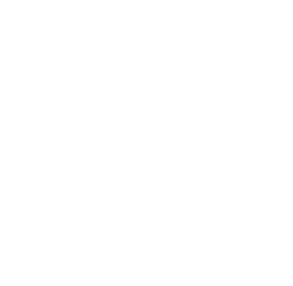

In [150]:
extracted = coco.coco_to_shapely("/home/robert/ds-wildfire/data/extracted/anno/anno_31_T_GJ_2017-07-26.json")
for key in sorted(extracted.keys()):
        plt.figure(figsize=(5, 5))
        plt.axis("off")

        img = np.asarray(pilimage.open(path_to_store_patches, key))

In [14]:
scenes

'31/T/GJ'

In [35]:
scene_list=list(scenes)
scene_list[2]="_"
scene_list[4]="_"
scene_list.insert(0,"_")
scene_list.insert(8, "_")
scene_string=""
scene_string=scene_string.join(scene_list)

In [36]:
scene_string

'_31_T_GJ_'

In [24]:
"".join(scene_string)

'31_T_GJ'

In [38]:
gpd.open(/ds-wildfire/data/extracted/burn_vis/raster_patch100449_31_T_GJ_2017-09-05.jpg)

SyntaxError: invalid syntax (<ipython-input-38-1e35dd6c3511>, line 1)

In [43]:
open_patch=rasterio.open("/home/robert/ds-wildfire/data/extracted/burn_vis/raster_patch100406_31_T_GJ_2017-09-07.jpg")

In [104]:
open_patch

<open DatasetReader name='/home/robert/ds-wildfire/data/extracted/burn_vis/raster_patch100406_31_T_GJ_2017-09-07.jpg' mode='r'>

In [44]:
open_patch.meta

{'driver': 'JPEG',
 'dtype': 'uint8',
 'nodata': None,
 'width': 4000,
 'height': 4000,
 'count': 3,
 'crs': None,
 'transform': Affine(1.0, 0.0, 0.0,
        0.0, 1.0, 0.0)}

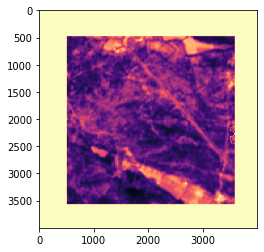

In [51]:
pyplot.imshow(open_patch.read(1), cmap='magma')

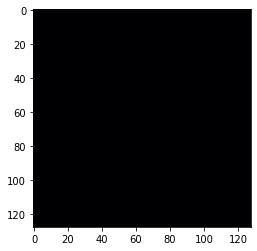

In [171]:
open_patch2=rasterio.open("/home/robert/ds-wildfire/data/extracted/patches/raster_patch100532_31_T_GJ_2017-10-09.jpg")
open_patch2.meta
pyplot.imshow(open_patch2.read(1), cmap='magma')

In [172]:
raster2=pyplot.imread("/home/robert/ds-wildfire/data/extracted/patches/raster_patch100532_31_T_GJ_2017-10-09.jpg")
raster2


array([[[  0, 255, 255],
        [  0, 255, 255],
        [  0, 255, 255],
        ...,
        [  0, 255, 255],
        [  0, 255, 255],
        [  0, 255, 255]],

       [[  0, 255, 255],
        [  0, 255, 255],
        [  0, 255, 255],
        ...,
        [  0, 255, 255],
        [  0, 255, 255],
        [  0, 255, 255]],

       [[  0, 255, 255],
        [  0, 255, 255],
        [  0, 255, 255],
        ...,
        [  0, 255, 255],
        [  0, 255, 255],
        [  0, 255, 255]],

       ...,

       [[  0, 255, 255],
        [  0, 255, 255],
        [  0, 255, 255],
        ...,
        [  0, 255, 255],
        [  0, 255, 255],
        [  0, 255, 255]],

       [[  0, 255, 255],
        [  0, 255, 255],
        [  0, 255, 255],
        ...,
        [  0, 255, 255],
        [  0, 255, 255],
        [  0, 255, 255]],

       [[  0, 255, 255],
        [  0, 255, 255],
        [  0, 255, 255],
        ...,
        [  0, 255, 255],
        [  0, 255, 255],
        [  0, 255, 255]]

In [170]:
raster2

array([[[ 49,   1,   1],
        [ 42,   0,   1],
        [ 36,   0,   0],
        ...,
        [ 69,   1,   0],
        [ 60,   0,   0],
        [ 56,   0,   1]],

       [[ 54,   0,   0],
        [ 52,   1,   0],
        [ 52,   1,   0],
        ...,
        [ 72,   0,   1],
        [ 69,   1,   0],
        [ 64,   0,   0]],

       [[ 66,   0,   1],
        [ 81,   0,   0],
        [ 82,   1,   0],
        ...,
        [ 72,   0,   1],
        [ 74,   0,   0],
        [ 88,   0,   0]],

       ...,

       [[ 99,   1,   0],
        [ 84,   0,   0],
        [ 88,   0,   0],
        ...,
        [ 55,   0,   0],
        [ 62,   0,   1],
        [ 59,   1,   0]],

       [[110,   0,   1],
        [ 89,   1,   0],
        [120,   0,   1],
        ...,
        [ 72,   0,   1],
        [ 78,   0,   0],
        [ 62,   1,   0]],

       [[143,   1,   0],
        [152,   0,   0],
        [174,   0,   1],
        ...,
        [ 70,   0,   0],
        [ 70,   0,   0],
        [ 62,   1,   0]]

In [173]:
numpy.unique(raster2).size



2

In [164]:
raster2.all()

False

In [174]:
if numpy.unique(raster2).size > 2:
    print("ok")



NameError: name 'gdal' is not defined

In [11]:
path = "/home/robert/ds-wildfire/data/extracted/anno/anno_31_T_GH_2017-09-07.json"

if "annotations" in other.load_json(path):
    print("boo")

boo


In [12]:
import pickle


with open('/home/robert/ds-wildfire/data/training_patches/anno/polygons.pkl', 'rb') as f:
    data = pickle.load(f)

In [36]:
list_of_paths[14]

'/home/robert/ds-wildfire/data/mgrs_scenes/31/T/GJ/2015/8/12/B8AB11B12.tif'

In [37]:
list_of_paths[14].find("12")

57

In [38]:
list_of_paths[4].index("12")

57

In [7]:
list_of_paths[14].find("/B", list_of_paths[14].find("20"))

59

In [15]:
s=filter(str.isdigit, list_of_paths[14])

In [19]:
s

In [21]:
int("".join(s))

ValueError: invalid literal for int() with base 10: ''

In [14]:
digits

''